In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import pandas as pd
from layers import InputToCx, CxMO, FreeSpacePropagation, CxD2NNIntensity, D2NNMNISTDetector, ImageResize, D2NNMNISTFilter

print("TensorFlow:", tf.__version__)
print("Python:", sys.version)
print("OpenCV:", cv2.__version__)

plt.rcParams['font.size'] = 18

TensorFlow: 2.8.0
Python: 3.8.11 (default, Aug 16 2021, 12:04:33) 
[Clang 12.0.0 ]
OpenCV: 4.5.2


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:
shape = (28, 28)
inputs = tf.keras.Input(shape)
x = D2NNMNISTFilter(shape)(inputs)

model = tf.keras.models.Model(inputs, x)
model.summary()

pred = model.predict(x_train)
pred.shape

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 d2nnmnist_filter_2 (D2NNMNI  (None, 28, 28)           0         
 STFilter)                                                       
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


2022-03-16 16:01:27.440676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(60000, 28, 28)

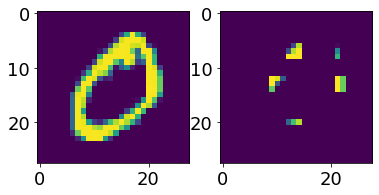

In [17]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(x_train[1,:,:])
axes[1].imshow(pred[1,:,:])

In [9]:
inp = np.zeros((10, 28, 28))
inp[:, :, :] = 1
pred = model.predict(inp)
pred.shape

2022-03-16 16:00:46.675752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(10, 28, 28)

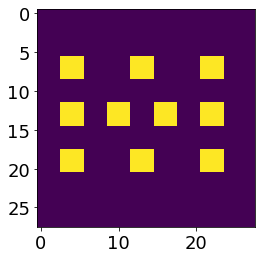

In [13]:
plt.imshow(pred[3,:,:])

<BarContainer object of 10 artists>

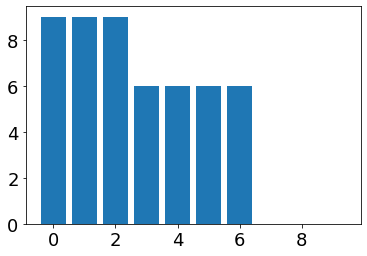

In [9]:
plt.bar(range(10), pred[0,:])

In [6]:
test = np.zeros((10, 10, 10))
w = np.zeros((10, 10, 10))
for i in range(10):
    test[i, i, i] = 1
    w[i, i, i] = 1

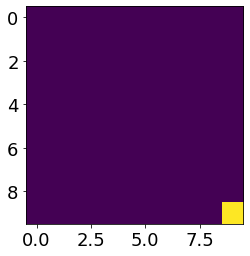

In [27]:
plt.imshow(test[9,:,:])